##### Python [conda env:DataScience]
<hr style="color:#FFA500; width:100%">

<div style="padding:10px; padding-left:15px; color:white; margin:0px; text-align:center; display:fill; border-radius:5px; background-color:#0000cd; overflow:hidden;">
    <h1 style="font-weight:bold;">
        Evaluación de Productividad de Profesores y de su belleza.
    </h1>
</div>

<h2 style="color:#ffa500;">Openintro - Professor evaluations and beauty: <a href="https://www.openintro.org/data/index.php?data=evals">Teaching ratings</a></h2>

### Evaluación de Productividad de Profesores y de su belleza.
- Belleza en el aula: pulcritud de los docentes y supuesta productividad pedagógica.

#### Introducción
Los datos se obtuvieron de las evaluaciones de fin de semestre de los estudiantes de 463 cursos impartidos por una muestra de 94 profesores de la Universidad de Texas en Austin. Además, seis estudiantes calificaron la apariencia física de los profesores. El resultado es un marco de datos donde cada fila contiene un curso diferente y cada columna tiene información sobre el curso y el profesor que lo impartió.

### Descripción de los Datos
| Variable|  Descripcion |
|---|---|
| minority  | ¿El instructor pertenece a un grupo minoritario (no caucásico)? |
|age| La edad del profesor |
|gender| Indicando si el instructor era hombre o mujer. |
|credits| ¿El curso es una materia optativa de crédito único? |
|beauty| Calificación de la apariencia física del instructor por un panel de seis estudiantes, promediada entre los seis panelistas y estandarizada para tener una media de cero. |
|eval| Puntuación global de la evaluación docente del curso, en una escala de 1 (muy insatisfactorio) a 5 (excelente). |
|division| ¿El curso es de división superior o inferior? |
|native| ¿Es el instructor un hablante nativo de inglés? |
|tenure| ¿El instructor tiene posibilidad de permanencia? |
|students| Número de estudiantes que participaron en la evaluación. |
|allstudents| Número de estudiantes matriculados en el curso. |
|prof| Indicando identificador del instructor. |


- #### Importación de los paquetes y bibliotecas necesarios:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- #### Leo los datos desde el archivo .csv con pandas

In [2]:
datos_de_calificacion = 'teachingratings.csv'
datos = pd.read_csv(datos_de_calificacion)

- ### Visualizo la información sobre el conjunto de datos

- #### Primeras cinco filas de datos.

In [3]:
datos.head()

minority  age  gender credits    beauty  eval division native tenure  \
0      yes   36  female    more  0.289916   4.3    upper    yes    yes   
1      yes   36  female    more  0.289916   3.7    upper    yes    yes   
2      yes   36  female    more  0.289916   3.6    upper    yes    yes   
3      yes   36  female    more  0.289916   4.4    upper    yes    yes   
4       no   59    male    more -0.737732   4.5    upper    yes    yes   

   students  allstudents  prof  PrimaryLast  vismin  female  single_credit  \
0        24           43     1            0       1       1              0   
1        86          125     1            0       1       1              0   
2        76          125     1            0       1       1              0   
3        77          123     1            1       1       1              0   
4        17           20     2            0       0       0              0   

   upper_division  English_speaker  tenured_prof  
0               1                1             1  
1               1                1             1  
2               1                1             1  
3               1                1             1  
4               1                1             1

- #### Obtengo la información sobre cada variable

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

- #### Obtengo el número de filas y columnas del conjunto de datos - (número de filas, número de columnas)

In [5]:
datos.shape

(463, 19)

- #### Tabla de estadísticas descriptivas

In [6]:
datos.describe()

age        beauty        eval    students  allstudents  \
count  463.000000  4.630000e+02  463.000000  463.000000   463.000000   
mean    48.365011  6.271140e-08    3.998272   36.624190    55.177106   
std      9.802742  7.886477e-01    0.554866   45.018481    75.072800   
min     29.000000 -1.450494e+00    2.100000    5.000000     8.000000   
25%     42.000000 -6.562689e-01    3.600000   15.000000    19.000000   
50%     48.000000 -6.801430e-02    4.000000   23.000000    29.000000   
75%     57.000000  5.456024e-01    4.400000   40.000000    60.000000   
max     73.000000  1.970023e+00    5.000000  380.000000   581.000000   

             prof  PrimaryLast      vismin      female  single_credit  \
count  463.000000   463.000000  463.000000  463.000000     463.000000   
mean    45.434125     0.203024    0.138229    0.421166       0.058315   
std     27.508902     0.402685    0.345513    0.494280       0.234592   
min      1.000000     0.000000    0.000000    0.000000       0.000000   
25%     20.000000     0.000000    0.000000    0.000000       0.000000   
50%     44.000000     0.000000    0.000000    0.000000       0.000000   
75%     70.500000     0.000000    0.000000    1.000000       0.000000   
max     94.000000     1.000000    1.000000    1.000000       1.000000   

       upper_division  English_speaker  tenured_prof  
count      463.000000       463.000000    463.000000  
mean         0.660907         0.939525      0.779698  
std          0.473913         0.238623      0.414899  
min          0.000000         0.000000      0.000000  
25%          0.000000         1.000000      1.000000  
50%          1.000000         1.000000      1.000000  
75%          1.000000         1.000000      1.000000  
max          1.000000         1.000000      1.000000

- Identifico los valores únicos en la variable "prof"

In [7]:
datos.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69])

- Cantidad de valores únicos en la variable "prof"

In [8]:
datos.prof.nunique()

94

- Elimino los duplicados utilizando "prof" como subconjunto y le asigno un nuevo nombre de marco de datos llamado "no_duplicados"

In [9]:
no_duplicados = datos.drop_duplicates(subset =['prof'])
no_duplicados.shape

(94, 19)

<h1 style="color:#ffa500; font-weight: bold;">Visualización de Datos:</h1>

- #### Distribución de los datos de variable belleza: "beauty".

(array([ 9.,  7., 35., 16., 50., 44., 34., 32., 59., 35., 16., 26., 19.,
        10., 21., 19.,  5.,  6., 16.,  4.]),
 array([-1.45049405, -1.2794682 , -1.10844234, -0.93741649, -0.76639063,
        -0.59536478, -0.42433892, -0.25331307, -0.08228722,  0.08873864,
         0.25976449,  0.43079035,  0.6018162 ,  0.77284206,  0.94386791,
         1.11489376,  1.28591962,  1.45694547,  1.62797133,  1.79899718,
         1.97002304]),
 <BarContainer object of 20 artists>)

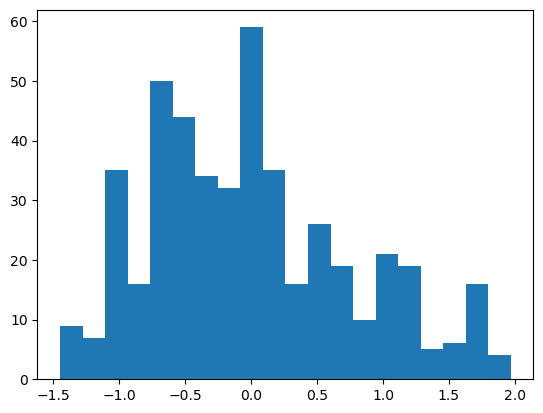

In [10]:
plt.hist(datos['beauty'], bins=20)

In [11]:
datos['beauty'].mean()

6.271139975345787e-08

- #### Promedio, desviación estandard y varianza de belleza con respecto a el género.

In [12]:
datos.groupby('gender').agg({'beauty':['mean', 'std', 'var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

- #### Visualizo la variable edad: "age"

(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <BarContainer object of 10 artists>)

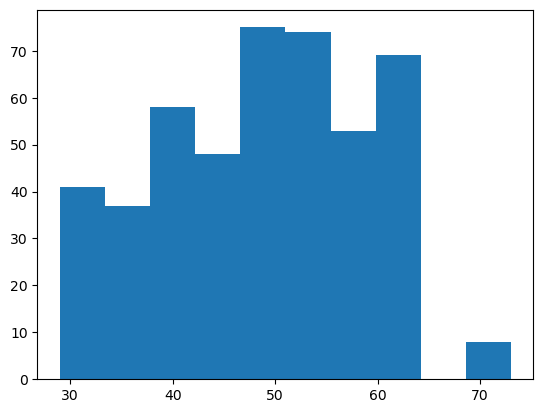

In [13]:
plt.hist(datos['age'])

- #### Diagrama de caja de la variable edad

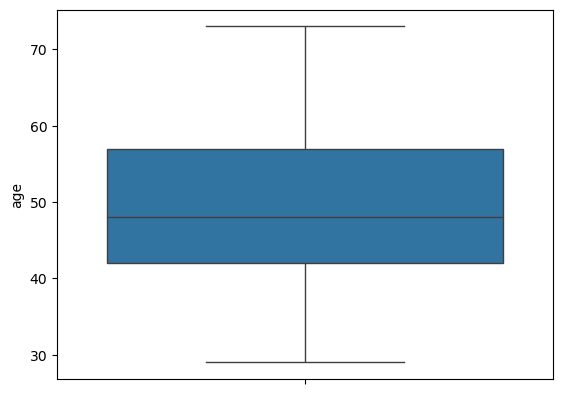

In [14]:
ax = sns.boxplot(y="age", data=datos)

- #### Edad promedio y desviación estandard de los profesores en el conjunto de datos.

In [15]:
datos.agg({'age':['mean', 'std']}).reset_index()

index        age
0  mean  48.365011
1   std   9.802742

- #### Edad promedio y desviación estandard de los profesores en el conjunto de datos por género.

In [16]:
datos.groupby('gender').agg({'age':['mean', 'std']}).reset_index()

gender        age          
                mean       std
0  female  45.092308  8.532031
1    male  50.746269  9.993396

- #### Utilzo el nuevo conjunto de datos sin duplicados para obtener el promedio real de la edad y la desviación estandard real.

In [17]:
no_duplicados.agg({'age':['mean', 'std']}).reset_index()

index        age
0  mean  47.553191
1   std  10.256513

- #### Visualizo la variable género: "gender"

Text(0.5, 1.0, 'Distribución por genero')

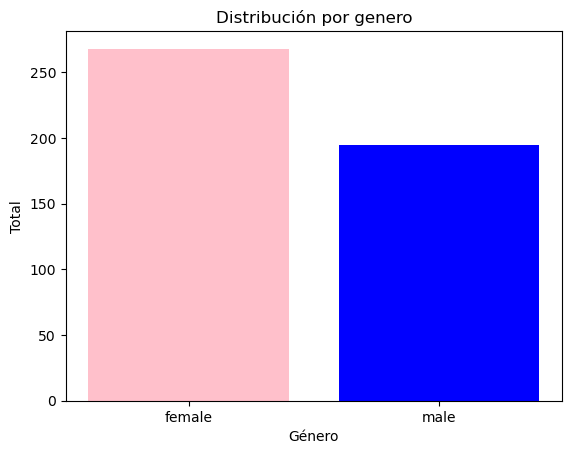

In [18]:
plt.bar(datos.gender.unique(),datos.gender.value_counts(),color=['pink','blue'])
plt.xlabel('Género')
plt.ylabel('Total')
plt.title('Distribución por genero')

- #### Visualizo la variable titular: "tenure"

Text(0.5, 1.0, 'Distribución de titularidad')

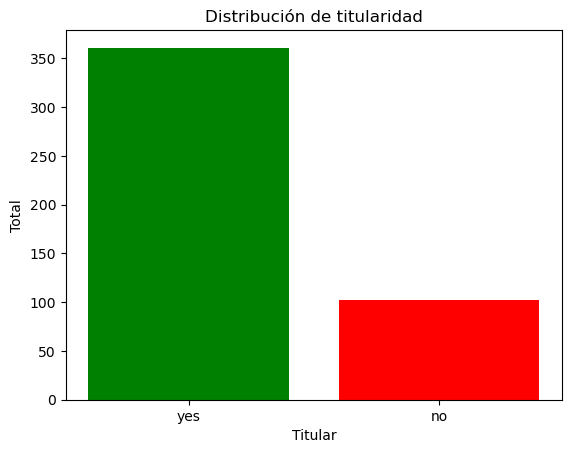

In [19]:
plt.bar(datos.tenure.unique(),datos.tenure.value_counts(),color=['green','red'])
plt.xlabel('Titular')
plt.ylabel('Total')
plt.title('Distribución de titularidad')

- #### Porcentaje de profesores titulares según género

In [20]:
num_titulares = datos[datos.tenure == 'yes'].groupby('gender').agg({'tenure': 'count'}).reset_index()
num_titulares

gender  tenure
0  female     145
1    male     216

In [21]:
num_titulares['percentage'] = 100 * num_titulares.tenure/num_titulares.tenure.sum()
num_titulares

gender  tenure  percentage
0  female     145   40.166205
1    male     216   59.833795

Text(0.5, 1.0, 'Porcentaje de profesores titulares por Género')

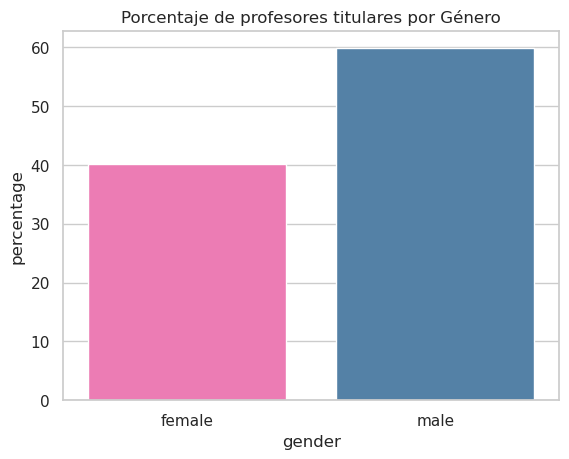

In [22]:
sns.set(style='whitegrid')
ax = sns.barplot(x='gender', y='percentage', data=num_titulares, hue='gender', palette=['#FF69B4', '#4682B4'])
ax.set_title('Porcentaje de profesores titulares por Género')

- #### Porcentaje de minorías visibles que son profesores titulares.

In [23]:
minorias_titulares = datos.groupby('minority').agg({'tenure': 'count'}).reset_index()
minorias_titulares['percentage'] = 100 * minorias_titulares.tenure/minorias_titulares.tenure.sum()
minorias_titulares

minority  tenure  percentage
0       no     399   86.177106
1      yes      64   13.822894

Text(0.5, 1.0, 'Porcentaje minorias que son profesores titulares')

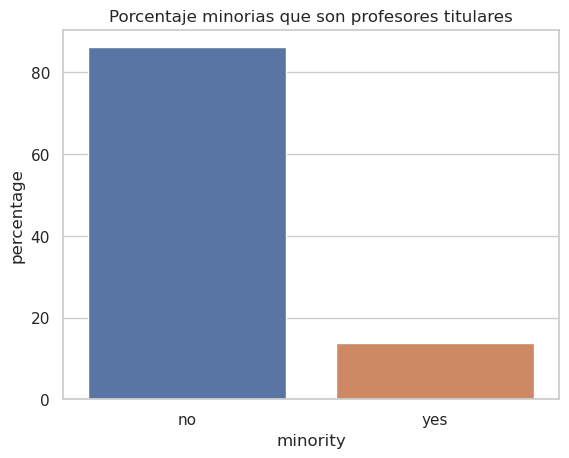

In [24]:
sns.set(style='whitegrid')
ax = sns.barplot(x='minority', y='percentage', data=minorias_titulares, hue='minority')
ax.set_title('Porcentaje minorias que son profesores titulares')

- #### Puntuación media de evaluación de los profesores titulares

In [25]:
datos[datos['tenure'] == 'yes']['eval'].median()

4.0

- #### Evaluación docente promedio en ambos grupos de división superior e inferior

In [26]:
evaluacion_de_division = datos.groupby('division')[['eval']].mean().reset_index()
evaluacion_de_division

division      eval
0    lower  4.087261
1    upper  3.952614

Text(0.5, 1.0, 'Promedio de evaluación por grupo de división')

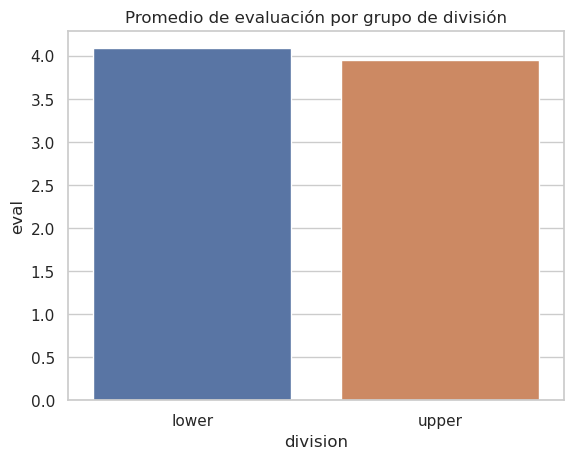

In [27]:
sns.set(style='whitegrid')
ax = sns.barplot(x='division', y='eval', data=evaluacion_de_division, hue='division')
ax.set_title('Promedio de evaluación por grupo de división')

- #### Gráfico de relación entre la edad y los puntajes de evaluación docente.

Text(0.5, 1.0, 'Relación: Edad y puntaje promedio')

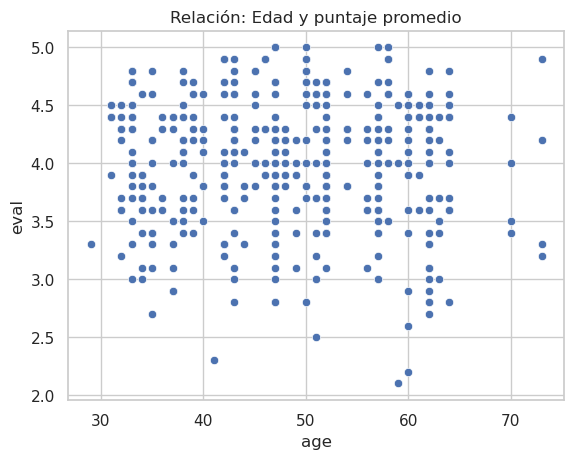

In [28]:
ax = sns.scatterplot(x='age', y='eval', data=datos)
ax.set_title('Relación: Edad y puntaje promedio')

- #### Gráfico de relación entre la edad y los puntajes de evaluación docente, diferenciados por género.

Text(0.5, 1.0, 'Relación: Edad y puntaje promedio por Género')

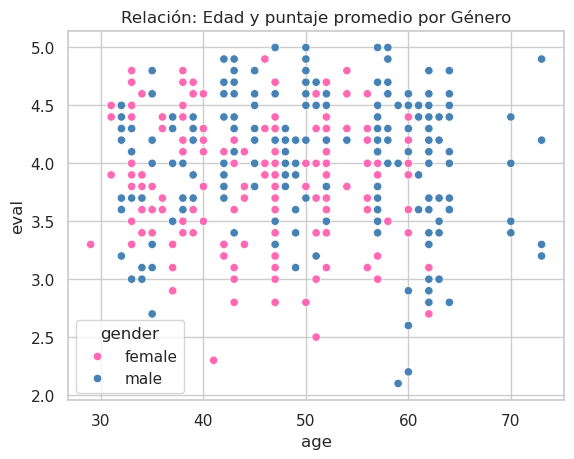

In [29]:
ax = sns.scatterplot(x='age', y='eval', hue='gender', data=datos, palette=['#FF69B4', '#4682B4'])
ax.set_title('Relación: Edad y puntaje promedio por Género')

- #### Cursos impartidos por género

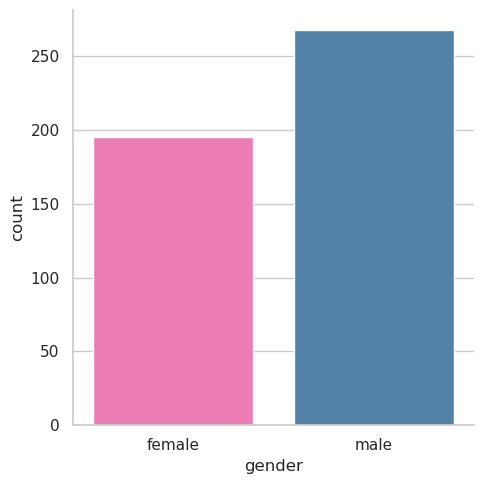

In [30]:
sns.catplot(x='gender', kind='count', data=datos, hue='gender', palette=['#FF69B4', '#4682B4'])

- #### Diagrama de caja para los puntajes de belleza diferenciados por créditos.

Text(0.5, 1.0, 'Relación: Puntaje de belleza por créditos')

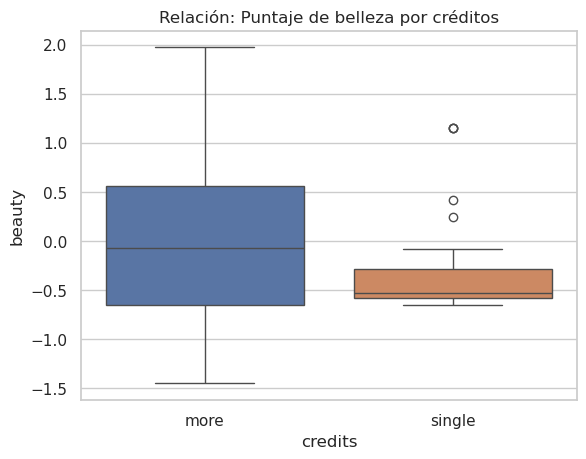

In [31]:
ax = sns.boxplot(x='credits', y='beauty', data=datos, hue='credits')
ax.set_title('Relación: Puntaje de belleza por créditos')

- #### Histograma grupal de docentes por género y antigüedad

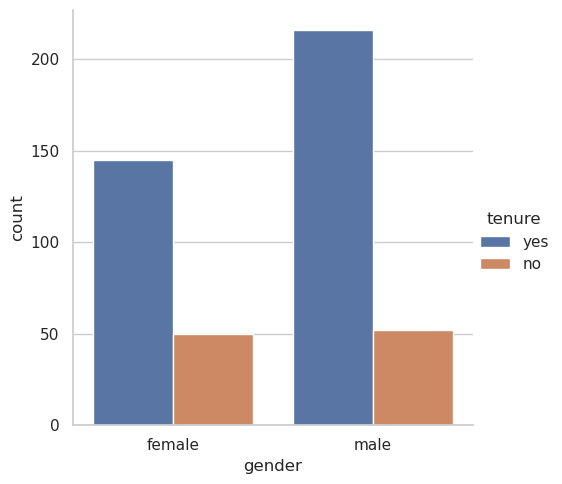

In [32]:
sns.catplot(x='gender', hue='tenure', kind='count', data=datos)

- #### Agrego la división como otro factor al histograma anterior

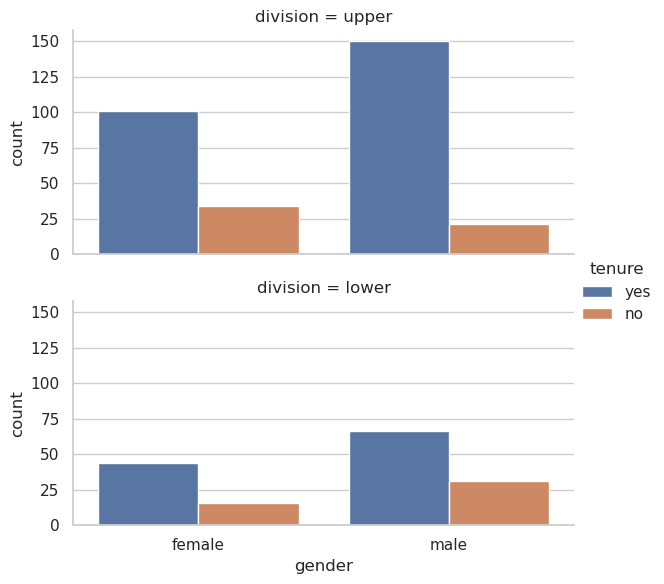

In [33]:
sns.catplot(x='gender', hue = 'tenure', row = 'division',
            kind='count', data=datos, height = 3, aspect = 2)

- #### Diagrama de dispersión de puntuaciones de edad y evaluación, diferenciadas por género y permanencia.

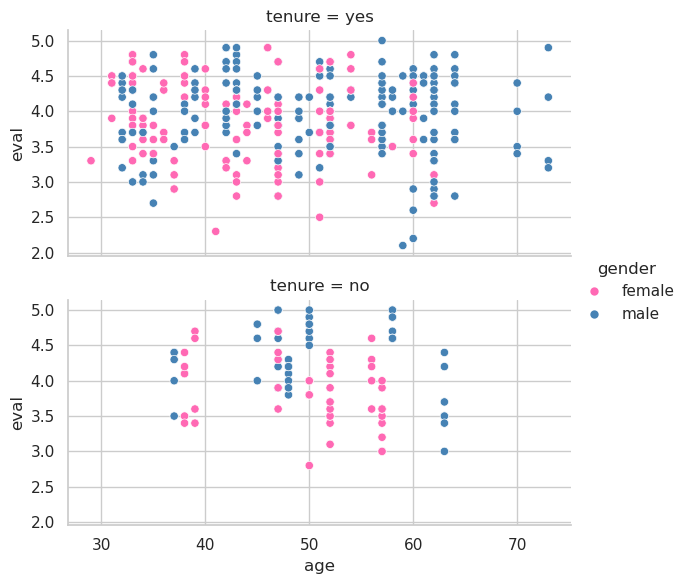

In [34]:
sns.relplot(x="age", y="eval", hue="gender", row="tenure", palette=['#FF69B4', '#4682B4'],
            data=datos, height=3, aspect=2)

- #### Gráfico de distribución de las puntuaciones de la evaluación docente

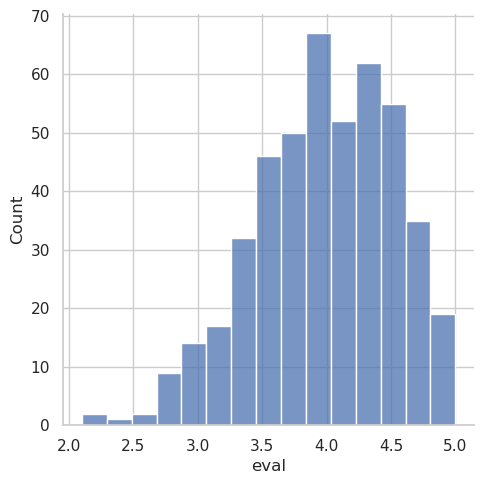

In [35]:
ax = sns.displot(datos['eval'], kde = False)

- #### Gráfico de distribución de la puntuación de la evaluación docente con el género como factor

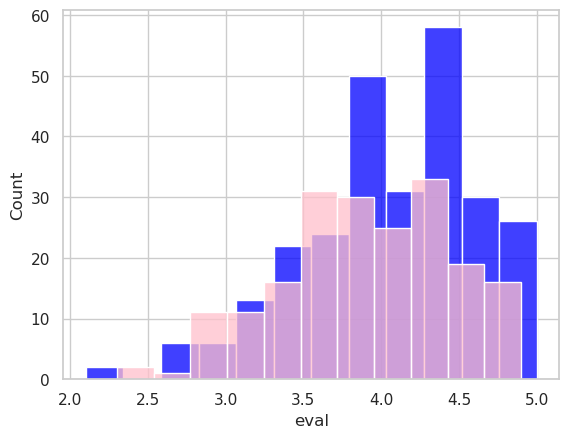

In [36]:
sns.histplot(datos[datos['gender'] == 'male']['eval'], color="blue", kde=False) 
sns.histplot(datos[datos['gender'] == 'female']['eval'], color='pink', kde=False)
plt.show()

- #### Diagrama de caja: edad docente por género

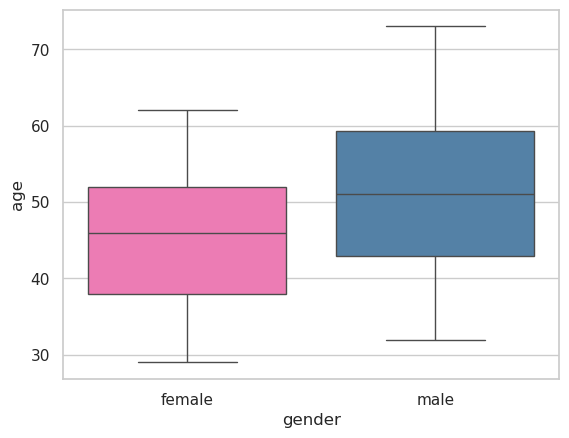

In [37]:
ax = sns.boxplot(x="gender", y="age", data=datos, hue='gender', palette=['#FF69B4', '#4682B4'])

- #### Comparo la edad con la permanencia en el cargo y el género

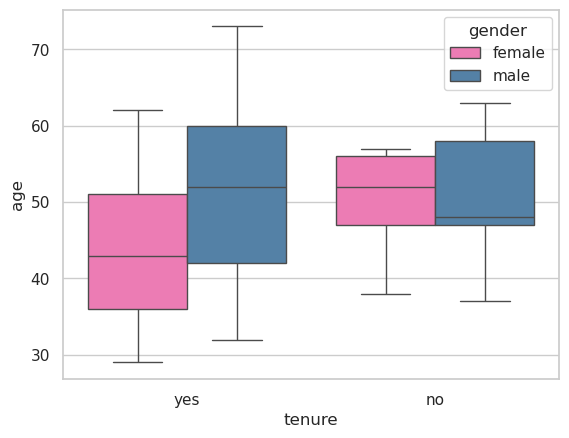

In [38]:
ax = sns.boxplot(x="tenure", y="age", hue="gender", data=datos, palette=['#FF69B4', '#4682B4'])

- #### Gráfico de distribución de puntuaciones de belleza con el hablante nativo de inglés como factor

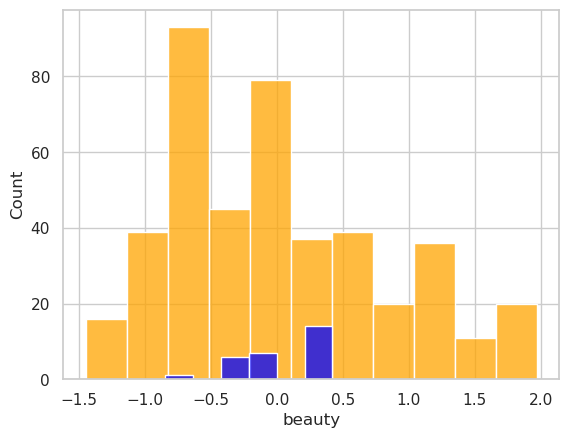

In [39]:
sns.histplot(datos[datos['native'] == 'yes']['beauty'], color="orange", kde=False) 
sns.histplot(datos[datos['native'] == 'no']['beauty'], color="blue", kde=False) 
plt.show()

- #### Diagrama de caja horizontal de la edad de los instructores por minoría visible

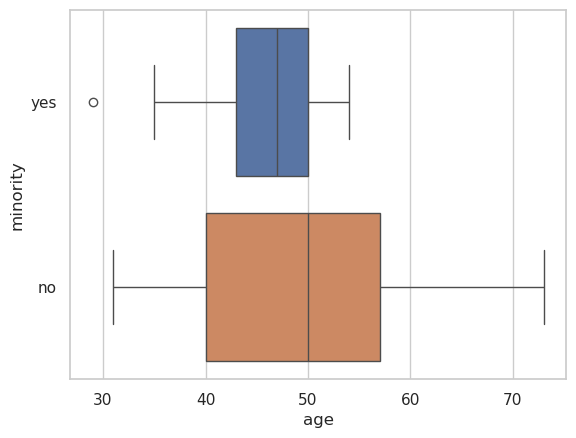

In [40]:
ax = sns.boxplot(x="age", y="minority", data=datos, hue='minority')

- #### Histograma grupal de permanencia en el cargo por minoría y el factor de género

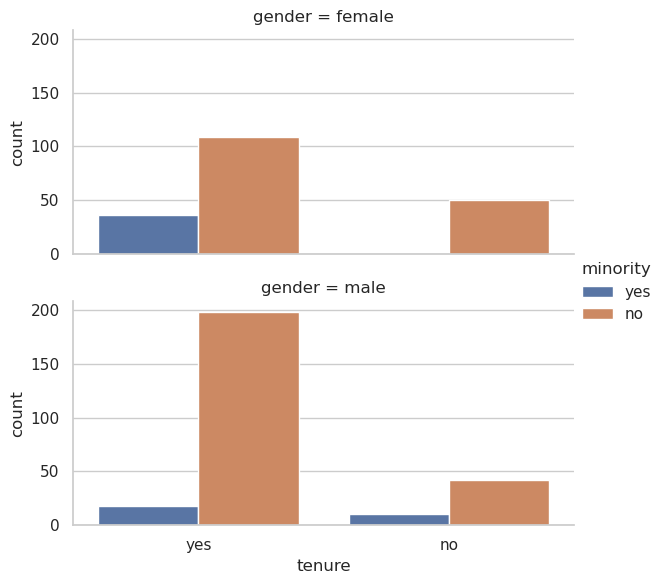

In [41]:
sns.catplot(x='tenure', hue='minority', row='gender',
            kind='count', data=datos, height = 3, aspect = 2)

<hr style="color:#FFA500; width:100%">
<h3 style="color:#ffa500;"> Registro de cambios:</h3>

| Fecha (DD/MM/AAAA) | Versión | Descripción del cambio |
| ------------------ | ------- | ---------------------- |
| 15/03/2024         | 00.0     | Descarga y proceso |
| 18/03/2024         | 01.0     | Agrego catplots |
| 19/03/2024         | 02.0     | Arreglo de errores |